### Grouping algorithm ran on the GAMA III equatorial field data for 0.002 < z < 0.65

In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from GalGroup import *

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
hdul = fits.open('gkvScienceCatv02.fits')
data = hdul[1].data
t=Table(data)
df = t.to_pandas()

In [3]:
df = df[df['SC']>=7]

In [4]:
df = add_column(df, column_file = 'SFMPhotoZv01.fits', column_name = 'zmax', common_column = 'uberID')
df.loc[df['NQ'] < 3, 'Z'] = df.loc[df['NQ'] < 3, 'zmax']
df.loc[df['NQ'] < 3, 'NQ'] = 10

In [5]:
df = df[(df['Z']>0.002) & (df['Z']<0.65) & (df['RAcen']<300)]

In [6]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,flux_err_W2t,duplicate,mask,starmask,uberclass,CATAID,SC,Z,NQ,zmax
0,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,9.162291e-06,False,False,False,1,3600151,8,0.08185,4,0.12
1,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,6.123744e-07,False,False,False,1,3874273,7,0.30551,4,0.27
2,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,8.127045e-06,False,False,False,1,3600249,8,0.28994,4,0.30
3,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,2.108944e-06,False,False,False,1,3600327,7,0.27092,4,0.26
4,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,1.040680e-06,False,False,False,1,3600321,7,0.29026,4,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161024,224021222504535,223.031751,2.343636,223.031720,2.343569,223.031692,2.343541,-1.074581e-13,3.976355e-12,-0.210898,...,1.793492e-06,False,False,False,1,263129,8,0.31855,4,0.30
161025,224021225210755,223.028958,2.929282,223.028921,2.929247,223.028893,2.929219,-5.399757e-13,3.939633e-12,-0.210898,...,1.444302e-06,False,False,False,1,3336094,7,0.48823,4,0.46
161026,224021226105464,223.028218,2.431092,223.028290,2.431043,223.028262,2.431016,-6.621136e-15,4.026632e-12,-0.210898,...,1.647582e-06,False,False,False,1,364114,8,0.19686,4,0.20
161027,224021228202966,223.026430,2.195831,223.026413,2.195829,223.026385,2.195802,-5.616802e-13,4.213400e-12,-0.210898,...,1.279430e-06,False,False,False,1,263115,7,0.31247,4,0.31


('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')
Fixed  0 missing fluxes
Replacing 39 bad fits with mean


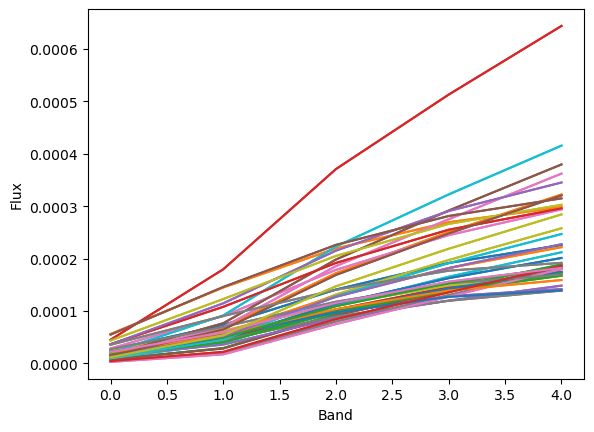

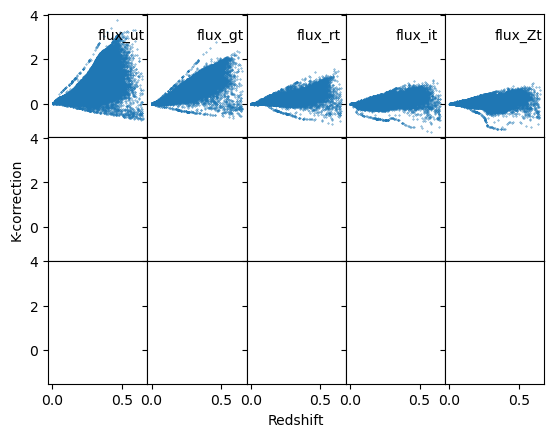

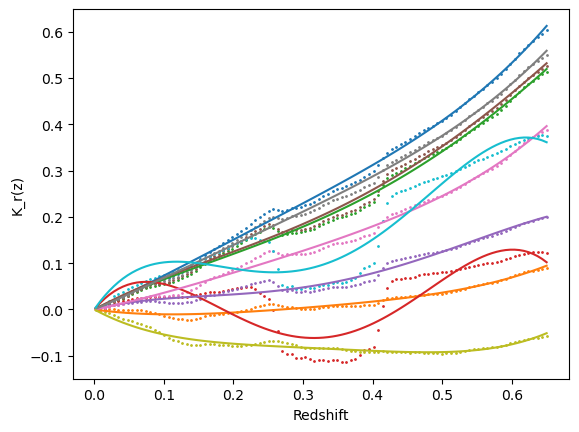

In [7]:
df = kcorrection(df, zrange = [0.002, 0.65], 
                 responses=['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z'], 
                 fnames=['flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt'], 
                 ferrnames=['flux_err_ut', 'flux_err_gt', 'flux_err_rt', 'flux_err_it', 'flux_err_Zt'], redshift='Z')

In [8]:
df = luminosity_distance(df, redshift='Z')

In [9]:
df = magnitude(df, bands=['u', 'g', 'r', 'i', 'Z'], fluxbands = ['flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt'])

C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
df = df[df['m_r']<19.65]

Constants used : H0 = 100 , Om0 = 0.25 , Ode0 = 0.75 , h = 1.0 km / (Mpc s) , alpha = -1.26 , M_star = -20.71 , phi_star = 0.009549925860214359 , b0 = 0.06 , R0 = 18 , Eb = -0.0 , Er = -0.02 , nu = 0.63 , delta = 9 , r_delta = 1500000.0 , l_delta = 12000000.0
Setting up the Group finder : 
Calculating rho_bar ...


0it [00:00, ?it/s]

Calculating rho_emp ...


  0%|          | 0/158866 [00:00<?, ?it/s]

  0%|          | 0/158866 [00:00<?, ?it/s]

Calculating R and b ...


  0%|          | 0/158866 [00:00<?, ?it/s]

Calculating D_lim ...


  0%|          | 0/158866 [00:00<?, ?it/s]

374 galaxies removed due to having D_lim > 10**8
Running the Group finder : 
Finding groups ...


  0%|          | 0/158492 [00:00<?, ?it/s]

Writing groups to a dataframe ...


  0%|          | 0/21786 [00:00<?, ?it/s]

  0%|          | 0/21786 [00:00<?, ?it/s]

Calculating group velocity dispersion ...


  0%|          | 0/21786 [00:00<?, ?it/s]

112 groups removed due to having Vel_Disp > 2500
Calculating group projected radius ...


  0%|          | 0/21674 [00:00<?, ?it/s]

Calculating group dynamical mass ...


  0%|          | 0/21674 [00:00<?, ?it/s]

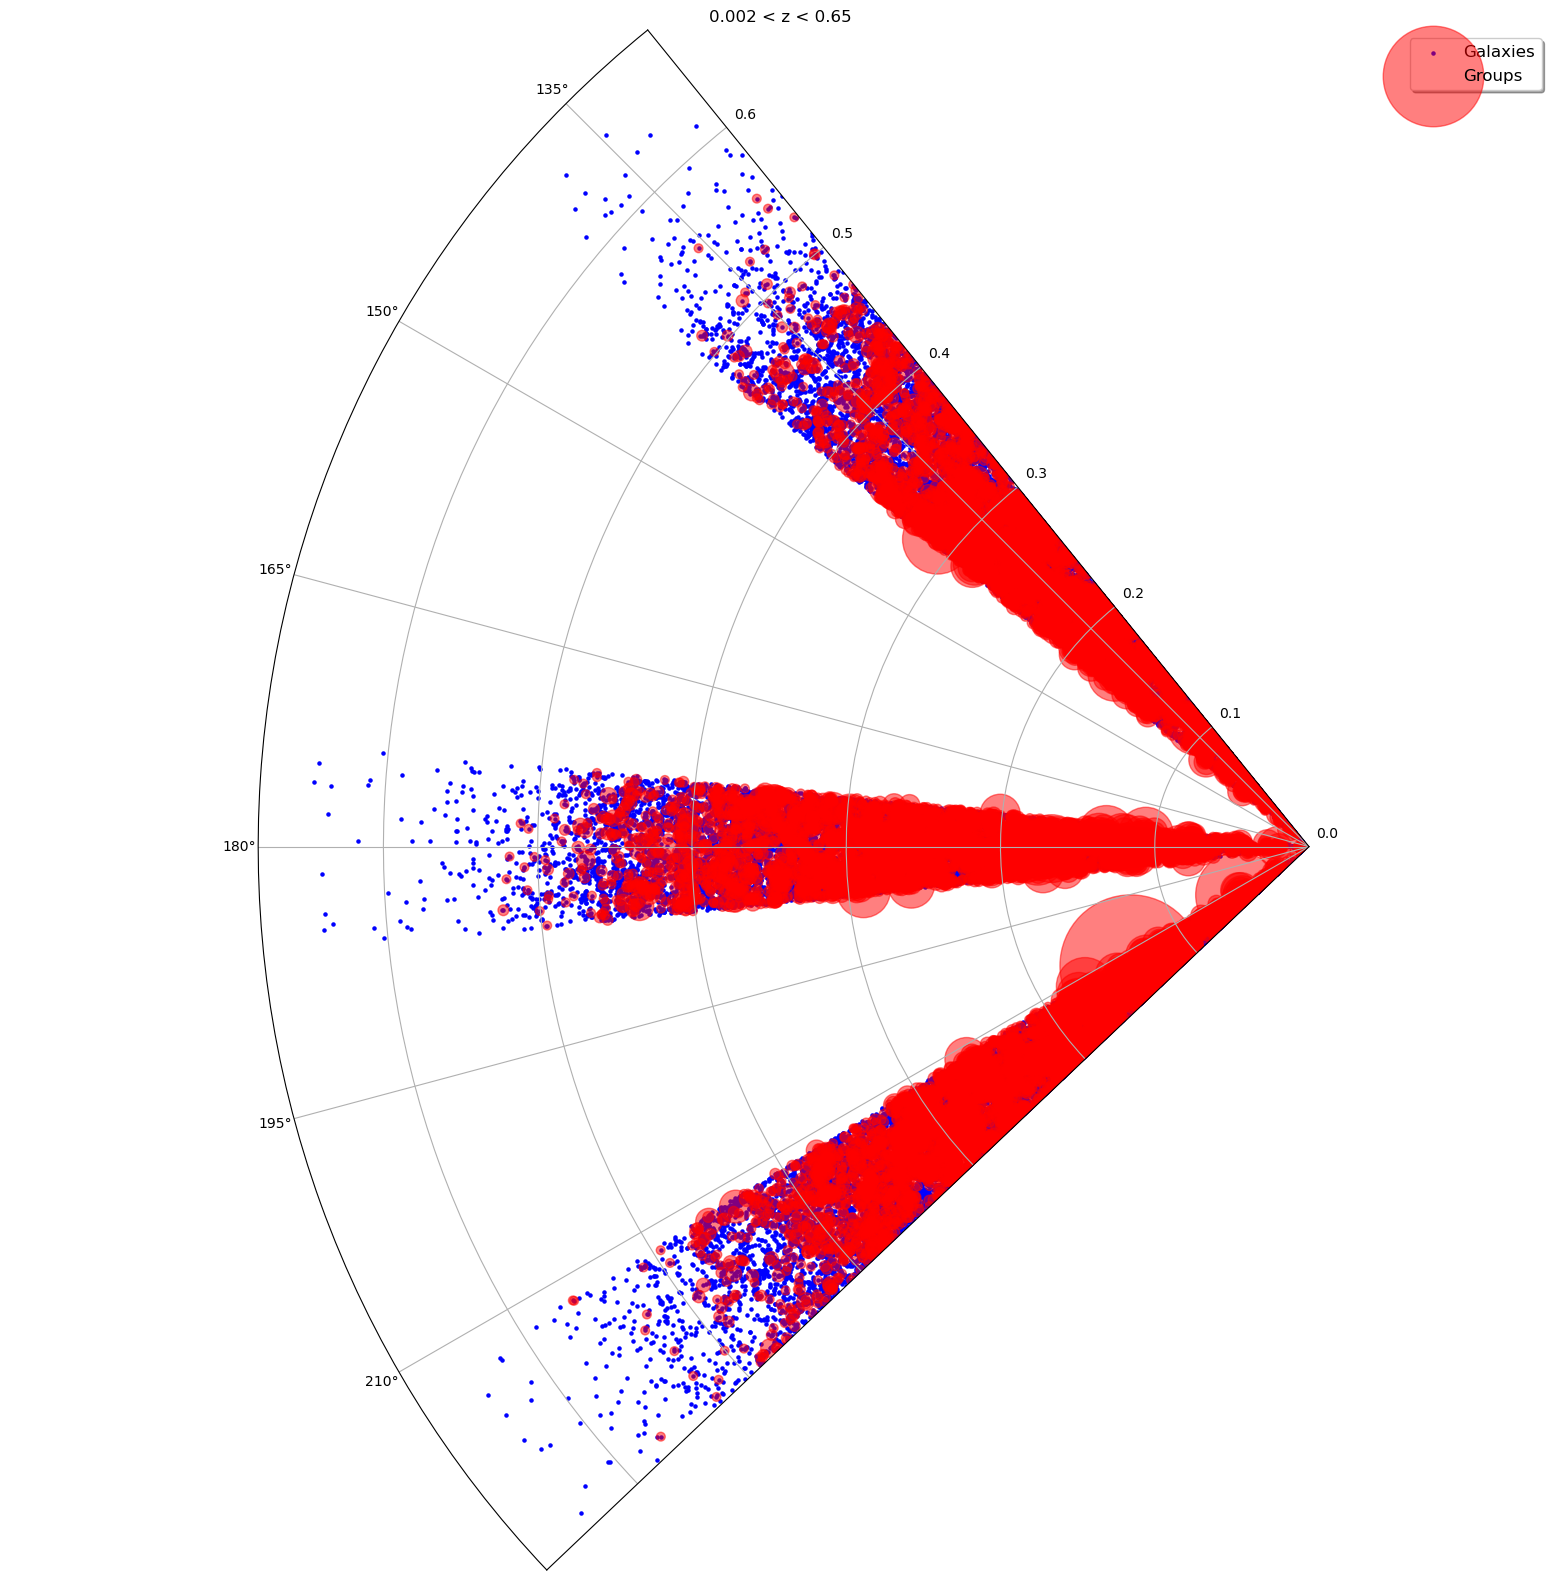

In [11]:
dfRec, df = main(dataframe = df, zmin=0.002, zmax=0.65, mag_col = 'm_r', Z_col = 'Z', Kcorr_col = 'r_Kcorrection', 
                 vel_err_col = None, RA_col = 'RAcen', Dec_col = 'Deccen', ID_col = 'uberID', H0=100, Om0=0.25, Ode0=0.75)

In [12]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,IndexLoc,Num_Den,rho_emp,b,R,D0,Ang_link,Los_link,RecID,v
0,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,0,23,0.271153,0.06,16.652591,3.726657e+06,0.000926,3.723510e+06,0,24538012.0
1,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,1,1,0.011789,0.06,16.530217,7.812231e+06,0.000545,7.748272e+06,0,91589592.0
2,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,2,3,0.035368,0.06,15.238100,1.462088e+07,0.001071,1.336767e+07,2,86921824.0
3,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,3,7,0.082525,0.06,16.077269,6.988330e+06,0.000546,6.741196e+06,0,81219776.0
4,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,4,3,0.035368,0.06,16.169123,7.843624e+06,0.000574,7.609471e+06,2,87017752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158487,224021222504535,223.031751,2.343636,223.031720,2.343569,223.031692,2.343541,-1.074581e-13,3.976355e-12,-0.210898,...,158487,1,0.011789,0.06,16.095799,1.030261e+07,0.000691,9.949725e+06,0,95498880.0
158488,224021225210755,223.028958,2.929282,223.028921,2.929247,223.028893,2.929219,-5.399757e-13,3.939633e-12,-0.210898,...,158488,2,0.023579,0.06,13.626124,4.684700e+07,0.002133,3.830058e+07,157761,146367664.0
158489,224021226105464,223.028218,2.431092,223.028290,2.431043,223.028262,2.431016,-6.621136e-15,4.026632e-12,-0.210898,...,158489,2,0.023579,0.06,16.880688,5.458754e+06,0.000577,5.528851e+06,0,59017140.0
158490,224021228202966,223.026430,2.195831,223.026413,2.195829,223.026385,2.195802,-5.616802e-13,4.213400e-12,-0.210898,...,158490,12,0.141471,0.06,15.436848,9.496300e+06,0.000649,8.795577e+06,157755,93676144.0


In [13]:
dfRec

,RecID,N,CentreID,Z,RA,Dec,CentreCATAID,VelDisp_raw,VelDisp,Rad,DynMass
0,2,2,2,0.28994,129.578549,-1.091716,128980005210530,93.204272,93.204272,0.182835,3.692843e+12
1,5,3,5,0.27072,129.573345,-1.640898,128980010904698,279.974098,279.974098,0.106072,1.933150e+13
2,8,2,8,0.20977,129.563301,-1.315744,128980021408151,12.427781,12.427781,0.037724,1.354690e+10
3,12,4,3787,0.26823,129.585021,-0.974538,129991060101155,274.557932,274.557932,0.565338,9.908468e+13
4,17,2,3015,0.26605,129.544184,-1.756349,129981103303472,323.488786,323.488786,0.119700,2.912352e+13
...,...,...,...,...,...,...,...,...,...,...,...
21669,158782,3,158782,0.31088,223.194144,2.481137,224021050105995,18.202639,18.202639,0.148124,1.141104e+11
21670,158797,2,158797,0.15098,223.182278,2.235683,224021062703389,13.058214,13.058214,0.110798,4.392701e+10
21671,158817,2,158817,0.37930,223.146642,2.191078,224021100602915,27.237979,27.237979,0.343803,5.930476e+11
21672,158823,2,158829,0.13938,223.128639,2.609369,224021119407358,432.003871,432.003871,0.025025,1.085863e+13
